# SLR MID EXAM

### Data_set: 
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [63]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
df=pd.read_csv("data_set.csv")

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Data Understanding (8 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK) 

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (2 marks) 

d. Check for defects in the data such as missing values, null, outliers, etc. (4 marks) 

In [54]:
#a
print('number of rows :',df.shape[0])
print('number of columns : ',df.shape[1])
print('Type of variables:')
df.info()

number of rows : 159
number of columns :  7
Type of variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [55]:
#b five point summary
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [56]:
#c observations for categorical variable
sum_species = df['Species'].value_counts()
categorical = pd.DataFrame(sum_species)
categorical['Percentage'] = categorical['Species'].apply(lambda x: round((x/np.sum(sum_species))*100,2))
categorical

,Species,Percentage
Perch,56,35.22
Bream,35,22.01
Roach,20,12.58
Pike,17,10.69
Smelt,14,8.81
Parkki,11,6.92
Whitefish,6,3.77


In [57]:
#check missing values and null
print('Missing and null values : ', df.isnull().sum())

Missing and null values :  Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


There are no missing values in the fish species dataset.

The outliers are shown using boxplot:


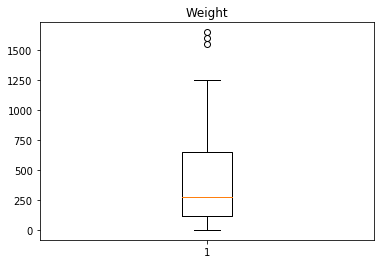

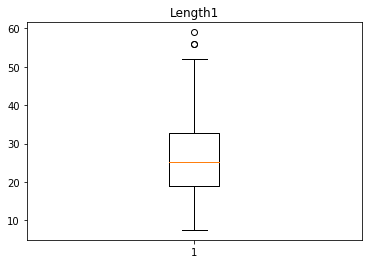

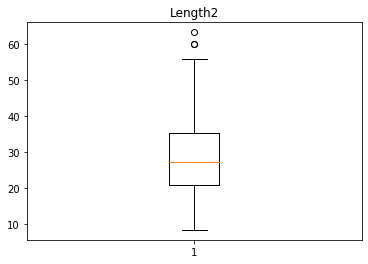

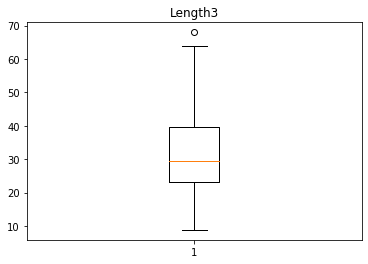

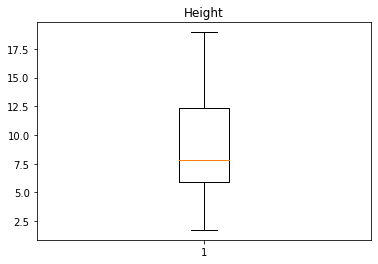

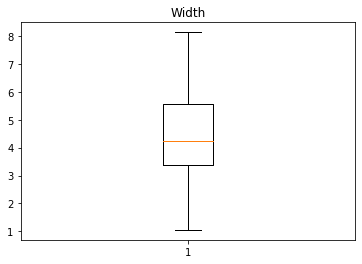

In [58]:
#outlier detection
outlier = df.select_dtypes(np.number)
print('The outliers are shown using boxplot:')
import seaborn as sns
import matplotlib.pyplot as plt
for column in outlier.columns:
    plt.boxplot(outlier[column])
    plt.title(column)
    plt.show()

From the above boxplot we could see that there is no outliers present in height and width out of all the numerical columns.

### 2. Data Preparation (17 marks) 

a. Fix the defects found above and do appropriate treatment if any. (4 marks) 

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks) 

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (4 marks) 

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 marks) 
 

# a) Fixing the defects

There are no missing and null values present in the fish species dataset, but only outliers.  
Outliers are present in weight,length1,length2 and length3 columns.

In [64]:
df.shape

(159, 7)

In [65]:
#Weight
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = q3-q1
df = df[(df['Weight']>q1-(1.5*iqr)) & (df['Weight']<q3+(1.5*iqr))]

In [66]:
#length1
q1 = df['Length1'].quantile(0.25)
q3 = df['Length1'].quantile(0.75)
iqr = q3-q1
df = df[(df['Length1']>q1-(1.5*iqr)) & (df['Length1']<q3+(1.5*iqr))]

In [67]:
#length2
q1 = df['Length2'].quantile(0.25)
q3 = df['Length2'].quantile(0.75)
iqr = q3-q1
df = df[(df['Length2']>q1-(1.5*iqr)) & (df['Length2']<q3+(1.5*iqr))]

In [68]:
#length3
q1 = df['Length3'].quantile(0.25)
q3 = df['Length3'].quantile(0.75)
iqr = q3-q1
df = df[(df['Length3']>q1-(1.5*iqr)) & (df['Length3']<q3+(1.5*iqr))]

In [69]:
df.shape

(155, 7)

In [ ]:
#The outliers have been removed. before outliers there were 159 records after removing there are 155 records.
#this small change wont affect the data so outliers can be removed.

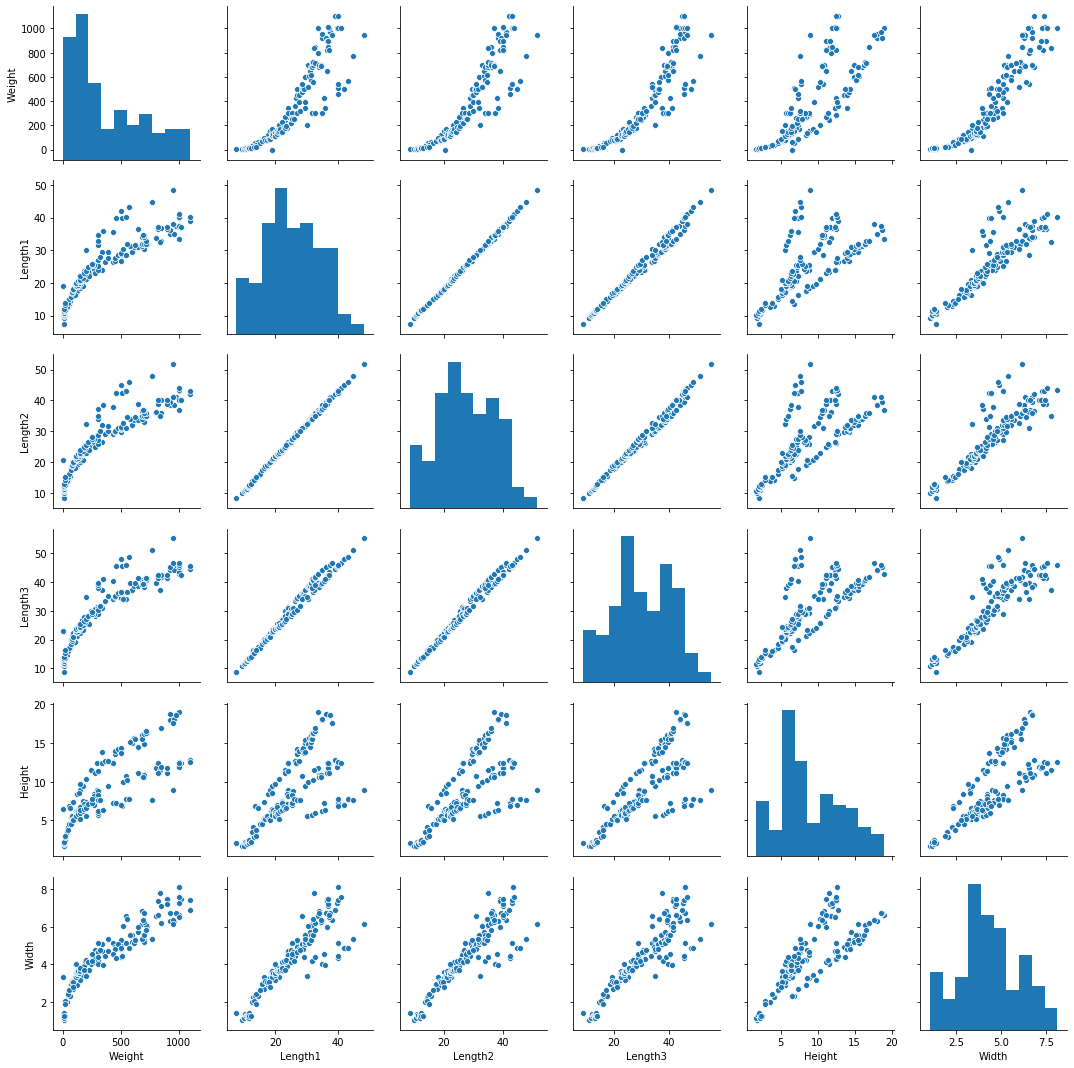

In [71]:
#b visualize the data
sns.pairplot(df)
plt.show()

In [73]:
#correlation between variables and target variable
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.890173,0.894415,0.902576,0.815237,0.925664
Length1,0.890173,1.000000,0.999385,0.990205,0.688050,0.891260
Length2,0.894415,0.999385,1.000000,0.992765,0.704041,0.897855
Length3,0.902576,0.990205,0.992765,1.000000,0.768038,0.898315
Height,0.815237,0.688050,0.704041,0.768038,1.000000,0.803268
Width,0.925664,0.891260,0.897855,0.898315,0.803268,1.000000


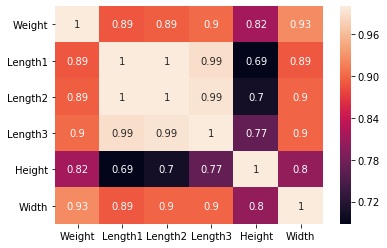

In [77]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## From above correation matrix and heat map we can conclude that the following varibles have high correlation with target variable weight:
### Length1 (0.89)
### Length2 (0.89)
### Length3 (0.9)
### height (0.82)
### width (0.93)

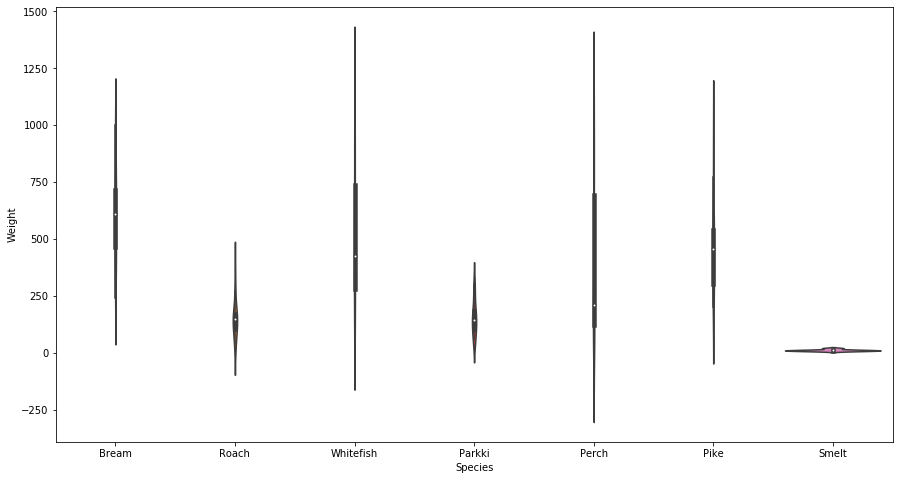

In [85]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.violinplot(x=df['Species'],y=df['Weight'])

From the striplot between species column and weight, we could see that change in species also affects weight.
since the mean changes for each species's weight. so they are highly correlated too.

#c
from above we can see there is high correaltion between columns.
we can use the vif test for multicollinearity to check if the variables are collinear and affect the model

In [86]:
#multicolinearity vif 
df1 = outlier.drop(columns='Weight')

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif1 = pd.DataFrame()
vif1['column'] = df1.columns
vif1['vif']=[vif(df1.values,i) for i in range(df1.shape[1])]
vif1

,column,vif
0,Length1,12782.535830
1,Length2,16598.744318
2,Length3,3380.815907
3,Height,76.064364
4,Width,92.658672


from above we can see length1,length2 and length3 have high multicollinearity with each other so we can eliminate them.

In [94]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [100]:
#d
#one hot encoding for categorical species column
dummy = pd.get_dummies(data=df,columns=['Species'],drop_first=True)
dummy.head(2)

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.52,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.48,4.3056,0,0,0,0,0,0


In [102]:
x=dummy.drop(columns='Weight')
y=dummy['Weight']
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=0)

In [103]:
x_train.mean()

Length1              25.294444
Length2              27.389815
Length3              30.183333
Height                8.805746
Width                 4.288494
Species_Parkki        0.083333
Species_Perch         0.342593
Species_Pike          0.101852
Species_Roach         0.129630
Species_Smelt         0.092593
Species_Whitefish     0.027778
dtype: float64

In [104]:
x_test.mean()

Length1              25.925532
Length2              28.097872
Length3              30.842553
Height                9.248279
Width                 4.520638
Species_Parkki        0.042553
Species_Perch         0.404255
Species_Pike          0.042553
Species_Roach         0.127660
Species_Smelt         0.085106
Species_Whitefish     0.063830
dtype: float64

from above means from both test and train we can see that the values are close to each other
so this splitting is correct representative of the original data

### 3. Model Building (25 marks) 

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (6 marks) 

b. Check for multi-collinearity and treat the same. (4 marks) 

c. How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.   (7 marks) 

d. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)  

e. What changes from the base model had the most effect on model performance? (4 marks) 

In [117]:
#a base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [118]:
ypredict_train = lr.predict(x_train)
ypredict_test = lr.predict(x_test)

In [121]:
from sklearn.metrics import r2_score as rs ,mean_squared_error as mse
#r2 score of base model
rs(y_test,ypredict_test)

0.9290256329220582

In [122]:
mse_val = mse(y_test,ypredict_test)
rmse = np.sqrt(mse_val)
rmse

81.25878675299707

In [123]:
rs(y_train,ypredict_train)

0.9484548152310738

In [124]:
mse_val = mse(y_train,ypredict_train)
rmse = np.sqrt(mse_val)
rmse

71.37047100437793

In [125]:
mape = np.mean(np.abs((y_test-ypredict_test)))*100
mape

6249.031991735043

In [126]:
np.mean(df['Weight'])

369.57354838709676

In [ ]:
#from above test has r2 as 92% and train has 94%.
#also rmse of test and train has 81 and 71 so the model isnt overfitting.

In [127]:
#b
sample_data = outlier.drop(columns='Weight')

In [128]:
vif2 = pd.DataFrame()
vif2['column'] = sample_data.columns

In [131]:
vif2['vif']=[vif(sample_data.values,i) for i in range(sample_data.shape[1])]
vif2

,column,vif
0,Length1,12782.535830
1,Length2,16598.744318
2,Length3,3380.815907
3,Height,76.064364
4,Width,92.658672


In [132]:
sample_data=sample_data.drop(columns='Length1')
vif2 = pd.DataFrame()
vif2['column'] = sample_data.columns
vif2['vif']=[vif(sample_data.values,i) for i in range(sample_data.shape[1])]
vif2

,column,vif
0,Length2,3305.983443
1,Length3,3380.711180
2,Height,70.504117
3,Width,92.536556


In [133]:
sample_data=sample_data.drop(columns='Length2')
vif2 = pd.DataFrame()
vif2['column'] = sample_data.columns
vif2['vif']=[vif(sample_data.values,i) for i in range(sample_data.shape[1])]
vif2

,column,vif
0,Length3,33.500624
1,Height,14.572390
2,Width,46.018044


In [134]:
sample_data=sample_data.drop(columns='Length3')
vif2 = pd.DataFrame()
vif2['column'] = sample_data.columns
vif2['vif']=[vif(sample_data.values,i) for i in range(sample_data.shape[1])]
vif2

,column,vif
0,Height,14.563219
1,Width,14.563219


In [135]:
#after removing length1,length2,length3 still multicollinearity is present.
#we should remove it by lasso or ridge

In [142]:
#c rfe
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe_col = RFE(estimator=lr,n_features_to_select=6)

In [143]:
rfe_select = rfe_col.fit(x,y)

In [144]:
select_col = rfe_select.get_support()

In [145]:
select_col = list(x.columns[select_col])

In [146]:
select_col

['Width',
 'Species_Parkki',
 'Species_Perch',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']

In [147]:
#this rfe removed unwanted columns and gave wanted columns

In [148]:
model = LinearRegression()

In [149]:
model.fit(x_train,y_train)

LinearRegression()

In [150]:
y_predit = model.predict(x_test)

In [152]:
rs(y_test,y_predit)

0.9290256329220582

In [153]:
mse_final = mse(y_test,y_predit)

In [154]:
rmse=np.sqrt(mse_final)

In [155]:
rmse

81.25878675299707

In [157]:
import statsmodels.api as sm
xc = sm.add_constant(x)
model_final = sm.OLS(y,x).fit()
model_final.summary()

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              427.4
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                   5.13e-104
Time:                        06:28:13   Log-Likelihood:                         -905.49
No. Observations:                 155   AIC:                                      1833.
Df Residuals:                     144   BIC:                                      1866.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Length1              62.4023     34.681      1.799      0.074      -6.147     130.952
Length2             103.2937     41.019      2.518      0.013      22.216     184.372
Length3            -147.6639     18.715     -7.890      0.000    -184.655    -110.673
Height               22.5274     12.551      1.795      0.075      -2.280      47.335
Width               117.7837     20.385      5.778      0.000      77.491     158.077
Species_Parkki     -331.2196     29.444    -11.249      0.000    -389.417    -273.022
Species_Perch      -474.3285     41.545    -11.417      0.000    -556.446    -392.211
Species_Pike       -357.5681    102.967     -3.473      0.001    -561.090    -154.046
Species_Roach      -331.5962     37.179     -8.919      0.000    -405.083    -258.110
Species_Smelt      -205.4095     36.447     -5.636      0.000    -277.449    -133.370
Species_Whitefish  -304.1895     51.376     -5.921      0.000    -405.738    -202.641
==============================================================================
Omnibus:                        9.252   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.599
Skew:                           0.432   Prob(JB):                      0.00499
Kurtosis:                       3.946   Cond. No.                         905.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

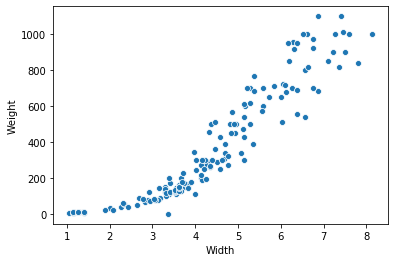

In [158]:
sns.scatterplot(x['Width'],y)

In [ ]:
sns.scatterplot(x['Height'],y)